In [2]:
# Task 1: Simple boolean network

from colomoto.minibn import BooleanNetwork
import pandas as pd

f = BooleanNetwork()

This notebook has been executed using the docker image `colomoto/colomoto-docker:2019-12-19`

In [3]:
# Boolean functions
A, B, C, D, E, F = f.vars("A", "B", "C", "D", "E", "F")

f[A] = A
f[B] = A & C & ~D
f[C] = B
f[D] = F
f[E] = C & ~D
f[F] = ~D & E

f

A <- A
B <- (A&C)&!D
C <- B
D <- F
E <- C&!D
F <- !D&E

In [4]:
# for the visualization of lists of states

import pandas as pd 
import biolqm
lqm = f.to_biolqm()

In [5]:
# Deterministic simulations

import pypint

an = biolqm.to_pint(lqm)
fps = biolqm.fixpoints(lqm)

fixpoints = pd.DataFrame(fps)
for x in range(0, 64):
    bitcode = format(x, '06b')[::-1]
    initString = "-u synchronous -m 50 -i " + bitcode
    #print(initString)
    trace = biolqm.trace(lqm, initString)
    df = pd.DataFrame( [s for s in trace] )
    print('\033[1m' + "Initial State " + str(x) + '\033[0m')
    print("\n")
    print(df)
    print("\n")
    
    ini = an.having(A=int(bitcode[0]),B=int(bitcode[1]), C=int(bitcode[2]), D=int(bitcode[3]), E=int(bitcode[4]), F=int(bitcode[5]))
    print("Pint reachable attractors")
    print(ini.reachable_attractors())
    print("\n")

Initial State 0


   A  B  C  D  E  F
0  0  0  0  0  0  0


Pint reachable attractors
[{'type': 'fixpoint', 'size': 1, 'sample': {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]


Initial State 1


   A  B  C  D  E  F
0  1  0  0  0  0  0


Pint reachable attractors
[{'type': 'fixpoint', 'size': 1, 'sample': {'A': 1, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]


Initial State 2


   A  B  C  D  E  F
0  0  1  0  0  0  0
1  0  0  1  0  0  0
2  0  0  0  0  1  0
3  0  0  0  0  0  1
4  0  0  0  1  0  0
5  0  0  0  0  0  0


Pint reachable attractors
[{'type': 'fixpoint', 'size': 1, 'sample': {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]


Initial State 3


   A  B  C  D  E  F
0  1  1  0  0  0  0
1  1  0  1  0  0  0
2  1  1  0  0  1  0
3  1  0  1  0  0  1
4  1  1  0  1  1  0
5  1  0  1  0  0  0


Pint reachable attractors
[{'type': 'fixpoint', 'size': 1, 'sample': {'A': 1, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]


Initial State 4


   A  B  C  D  E  F
0  0  0  1  0  0  0
1  0  0  0  0 

In [6]:
# Determine fixpoints

fps = biolqm.fixpoints(lqm)
pd.DataFrame(fps)

,A,B,C,D,E,F
0,0,0,0,0,0,0
1,1,0,0,0,0,0


In [7]:
# Get states that don't end in fixpoint
#Identification of stable motifs (trapspaces)


traps = biolqm.trapspace(lqm)
pd.DataFrame(traps)

,A,B,C,D,E,F
0,0,0,0,0,0,0
1,1,0,0,0,0,0


In [8]:
attractors = an.reachable_attractors()
attractors

[{'type': 'fixpoint',
  'size': 1,
  'sample': {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]

In [23]:
#perform simulation states with 4
trace = biolqm.trace(lqm, "-u synchronous -i 001000 -m 50")
pd.DataFrame( [s for s in trace] )

,A,B,C,D,E,F
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [28]:
an.initial_state["C"] = 1 # modification of the initial state
#attractors
attractors = an.reachable_attractors()
attractors

[{'type': 'fixpoint',
  'size': 1,
  'sample': {'A': 1, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]

In [24]:
#perform simulation states with 21
trace = biolqm.trace(lqm, "-u synchronous -i 101010 -m 50")
pd.DataFrame( [s for s in trace] )

,A,B,C,D,E,F
0,1,0,1,0,1,0
1,1,1,0,0,1,1
2,1,0,1,1,0,1
3,1,0,0,1,0,0
4,1,0,0,0,0,0


In [27]:
an.initial_state["A"] = 1
an.initial_state["C"] = 1 
an.initial_state["E"] = 1# # modification of the initial state
attractors = an.reachable_attractors()
attractors

[{'type': 'fixpoint',
  'size': 1,
  'sample': {'A': 1, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]

In [25]:
#perform simulation states with 33
trace = biolqm.trace(lqm, "-u synchronous -i 100001 -m 100")
pd.DataFrame( [s for s in trace] )

,A,B,C,D,E,F
0,1,0,0,0,0,1
1,1,0,0,1,0,0
2,1,0,0,0,0,0


In [26]:
an.initial_state.reset()
an.initial_state["A"] =1
an.initial_state["F"] = 1# # modification of the initial state
attractors = an.reachable_attractors()
attractors

[{'type': 'fixpoint',
  'size': 1,
  'sample': {'A': 1, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}}]

In [29]:
# Create a model graph

lqm = f.to_biolqm()
biolqm.save(lqm, "model.ginml", "ginml")

'model.ginml'

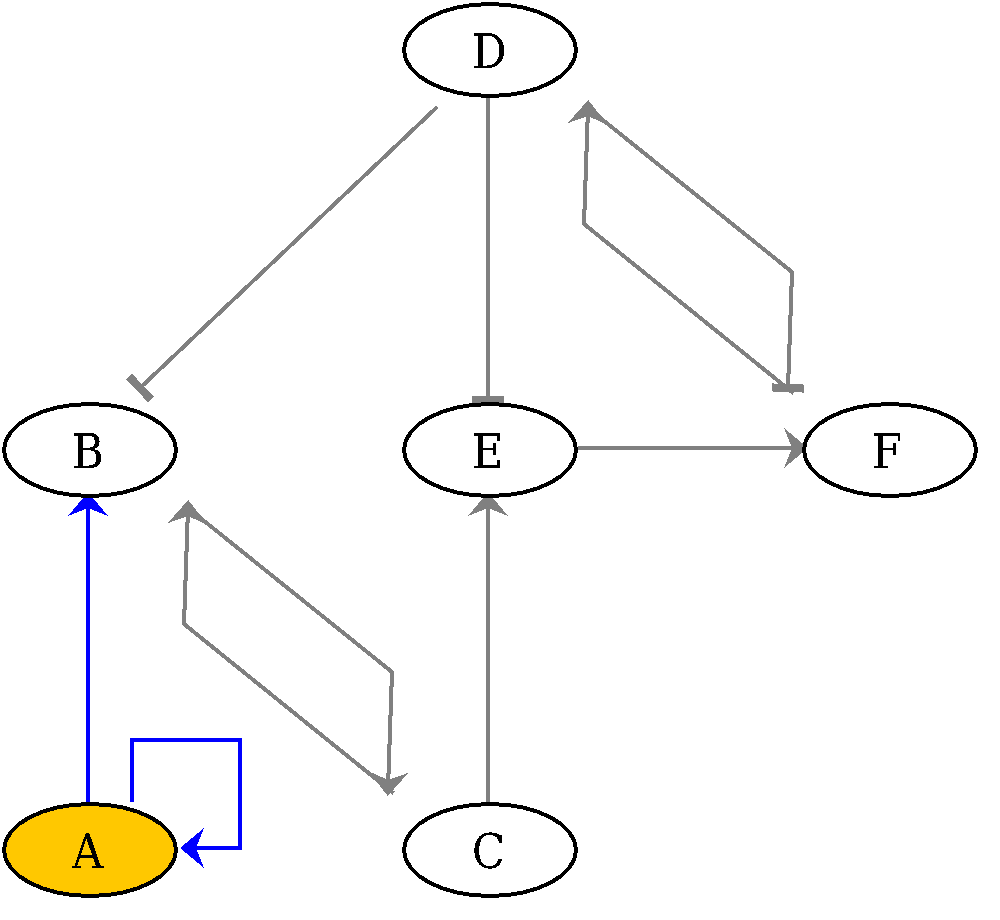

In [31]:
# Change the 'model.ginml' code in the library 

import ginsim
lrg = ginsim.load("model.ginml")
ginsim.show(lrg, fps[1])